# Checking Data and completing necessary data

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [40]:
df = pd.read_csv("marketing_practice_data.csv")
print(df.isnull().sum())
print(df.info())
df["Date"] = pd.to_datetime(df["Date"], format='%d/%m/%Y')

Transaction_ID    0
Date              0
Customer_Age      0
Gender            0
Location          0
Category          0
Cost_Price        0
Quantity          0
Ad_Spent          0
Sale_Price        0
dtype: int64
<class 'pandas.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Transaction_ID  1000 non-null   int64  
 1   Date            1000 non-null   str    
 2   Customer_Age    1000 non-null   int64  
 3   Gender          1000 non-null   str    
 4   Location        1000 non-null   str    
 5   Category        1000 non-null   str    
 6   Cost_Price      1000 non-null   float64
 7   Quantity        1000 non-null   int64  
 8   Ad_Spent        1000 non-null   float64
 9   Sale_Price      1000 non-null   float64
dtypes: float64(3), int64(3), str(4)
memory usage: 78.3 KB
None


---

## Financial MetricsTask 
- Calculate Total_Revenue (Sale_Price * Quantity) and Total_Profit (Total_Revenue - (Cost_Price * Quantity))
- Calculate ROAS (Return on Ad Spend) using the formula: ROAS = Total_Revenue / Ad_Spent
- Create an Age_Group column: 18-30 (Young Adult), 31-50 (Adult), 51+ (Senior)

In [41]:
df["Total_Revenue"] = df["Sale_Price"] * df["Quantity"]
df["Total_Profit"] = df["Total_Revenue"] - (df["Cost_Price"] * df["Quantity"])

df["Return_on_Ad_Spend"] = df["Total_Revenue"] / df["Ad_Spent"]

df["Age_Group"] = np.where(((df["Customer_Age"]>=18) & (df["Customer_Age"]<=30)), "Young", df["Customer_Age"])
df["Age_Group"] = np.where(((df["Customer_Age"]>30) & (df["Customer_Age"]<=50)), "Adult", df["Age_Group"])
df["Age_Group"] = np.where(df["Customer_Age"]>50, "Senior", df["Age_Group"])

print(df)

     Transaction_ID       Date  Customer_Age      Gender      Location  \
0              5001 2023-01-01            56  Non-Binary       Phoenix   
1              5002 2023-01-02            46      Female      New York   
2              5003 2023-01-03            32  Non-Binary      New York   
3              5004 2023-01-04            60      Female   Los Angeles   
4              5005 2023-01-05            25      Female       Chicago   
..              ...        ...           ...         ...           ...   
995            5996 2025-09-22            22        Male   Los Angeles   
996            5997 2025-09-23            40      Female       Phoenix   
997            5998 2025-09-24            27      Female  Philadelphia   
998            5999 2025-09-25            61        Male   Los Angeles   
999            6000 2025-09-26            19      Female  Philadelphia   

        Category  Cost_Price  Quantity  Ad_Spent  Sale_Price  Total_Revenue  \
0    Electronics      167.95    

---

# Deep Dive Analysis
- Which Location provides the best average ROAS?

In [42]:
best_ROAS_loc = df.groupby("Location")["Return_on_Ad_Spend"].sum().sort_values(ascending=False)
print(best_ROAS_loc)

Location
Phoenix         19572.982931
Los Angeles     18418.751825
Philadelphia    18037.703420
Chicago         17764.715789
Houston         15528.461769
New York        13390.224095
Name: Return_on_Ad_Spend, dtype: float64


- Create a pivot table showing the total profit for each Category broken down by Gender.

In [45]:
pivotTab_Gend_Categ_TP = pd.pivot_table(df,
                           values = "Total_Profit", 
                           index = "Category", 
                           columns = "Gender",
                           aggfunc="sum",
                           margins=True)

print(pivotTab_Gend_Categ_TP)

Gender          Female       Male  Non-Binary        All
Category                                                
Beauty        38365.10   49903.25    48305.30  136573.65
Books         49406.28   31974.90    30974.66  112355.84
Electronics   43238.95   40097.21    35920.77  119256.93
Fitness       54039.57   45204.58    51608.01  150852.16
Home Decor    38391.25   43739.23    34833.13  116963.61
All          223441.15  210919.17   201641.87  636002.19


- Use df.corr() to find the correlation between Ad_Spent and Quantity

Correlation measures how strongly two variables move together.

In [48]:
correlation_AdSp_Quan = df[["Ad_Spent", "Quantity"]].corr()
print(correlation_AdSp_Quan)

          Ad_Spent  Quantity
Ad_Spent  1.000000 -0.007361
Quantity -0.007361  1.000000


What It Actually Means:-
- There is no meaningful linear relationship between ad spending and quantity sold in your dataset.
- If ad spend increases : Quantity does not consistently increase
- Quantity does not consistently decrease : It just… does its own thing

---

# Advanced Visuals
- Create a Histogram of Customer_Age to see your target demographic.

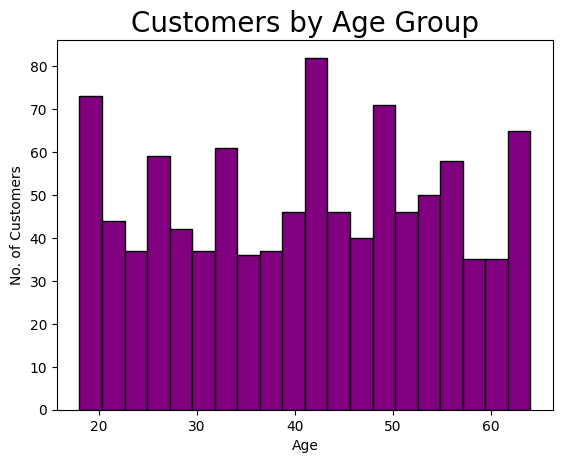

In [66]:
plt.hist(df["Customer_Age"],
         edgecolor = "black",
         color = "purple",
         bins= 20)
plt.title("Customers by Age Group" , fontsize=20)
plt.xlabel("Age")
plt.ylabel("No. of Customers")
plt.show()

The target customers are between the age of 40-45

- Create a Boxplot of Sale_Price grouped by Category to identify price outliers.

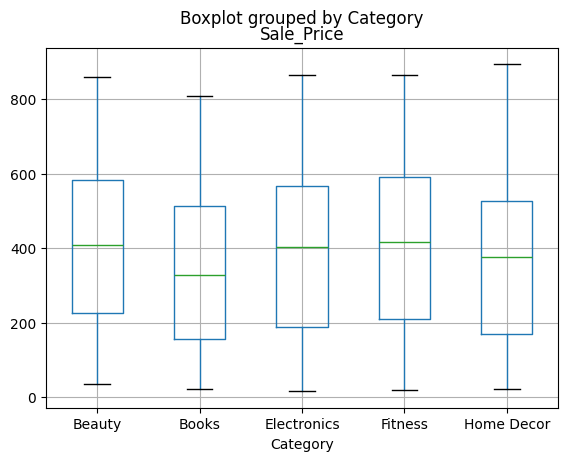

In [ ]:
df.boxplot(column='Sale_Price', by='Category')
plt.show()

- Create a Stacked Bar Chart showing Total_Revenue per Location with segments for each Category.